In [238]:
import pandas as pd
import numpy as np
from IPython.display import display
from info_enhance import *

import matplotlib.pyplot as plt
import seaborn as sns



In [239]:
bud = pd.read_csv('Budget.csv')
trans = pd.read_csv('personal_transactions.csv')
trans.Date = pd.to_datetime(trans.Date)

In [240]:
print('Overview')
print('Budget:--------------------------------------------------------------')
display(bud.head(5))
bud_ = infoOut(bud,vunique=True)
display(bud_)
print('Transaction:--------------------------------------------------------------')
display(trans.head(5))
trans_ = infoOut(trans,vunique=True)
display(trans_)

Overview
Budget:--------------------------------------------------------------


,Category,Budget
0,Alcohol & Bars,50
1,Auto Insurance,75
2,Coffee Shops,15
3,Electronics & Software,0
4,Entertainment,25


,Column,Non-Null Count,Dtype,Unique
0,Category,19,object,Shopping Mobile Phone Coffee Shops Utilities A...
1,Budget,19,int64,0 65 100 75 1100 11 15 50 150 25 250 30


Transaction:--------------------------------------------------------------


,Date,Description,Amount,Transaction Type,Category,Account Name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card


,Column,Non-Null Count,Dtype,Unique
0,Date,806,datetime64[ns],2018-01-15 00:00:00 2018-04-03 00:00:00 2018-0...
1,Description,806,object,German Restaurant Latin Restaurant Hawaiian Gr...
2,Amount,806,float64,1.75 2.0 3.0 4.0 3.5 5.09 6.41 8.0 8.49 10.69 ...
3,Transaction Type,806,object,debit credit
4,Category,806,object,Shopping Mobile Phone Food & Dining Coffee Sho...
5,Account Name,806,object,Silver Card Platinum Card Checking


In [241]:
print('Budget:--------------------------------------------------------------')
print(bud.isnull().sum())
print('Transaction:--------------------------------------------------------------')
print(trans.isnull().sum())

Budget:--------------------------------------------------------------
Category    0
Budget      0
dtype: int64
Transaction:--------------------------------------------------------------
Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64


In [242]:
da = trans.iloc[:,:]
display(da.head(5))
da["Month"] = da["Date"].map(lambda ts: ts.strftime("%m"))
display(da.head(5))
da.groupby('Month').size()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card


,Date,Description,Amount,Transaction Type,Category,Account Name,Month
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card,01
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,01
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card,01
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,01
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card,01


Month
01    60
02    68
03    77
04    86
05    74
06    75
07    81
08    73
09    80
10    38
11    43
12    51
dtype: int64

In [243]:
cols = ['Description', 'Amount', 'Transaction Type', 'Category',
        'Account Name', 'Month']
db = da.loc[:,cols]
db.set_index('Month')
display(db.head(5))

print(db.groupby('Month')['Transaction Type'].unique())

,Description,Amount,Transaction Type,Category,Account Name,Month
0,Amazon,11.11,debit,Shopping,Platinum Card,01
1,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,01
2,Thai Restaurant,24.22,debit,Restaurants,Silver Card,01
3,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,01
4,Netflix,11.76,debit,Movies & DVDs,Platinum Card,01


Month
01    [debit, credit]
02    [debit, credit]
03    [debit, credit]
04    [debit, credit]
05    [debit, credit]
06    [debit, credit]
07    [debit, credit]
08    [debit, credit]
09    [debit, credit]
10    [debit, credit]
11    [debit, credit]
12    [debit, credit]
Name: Transaction Type, dtype: object


In [244]:
debit_per_month = da[da['Transaction Type']=='debit'].groupby('Month')['Transaction Type'].count()
credit_per_month = da[da['Transaction Type']=='credit'].groupby('Month')['Transaction Type'].count()
display(debit_per_month)
display(credit_per_month)
debit_credit_per_month = pd.concat([debit_per_month,credit_per_month],axis=1,join='inner')
debit_credit_per_month.columns = ['Debit_per_month','Credit_per_month']
display(debit_credit_per_month)

Month
01    51
02    58
03    66
04    74
05    65
06    63
07    69
08    59
09    67
10    33
11    37
12    46
Name: Transaction Type, dtype: int64

Month
01     9
02    10
03    11
04    12
05     9
06    12
07    12
08    14
09    13
10     5
11     6
12     5
Name: Transaction Type, dtype: int64

,Debit_per_month,Credit_per_month
Month,,
01,51,9
02,58,10
03,66,11
04,74,12
05,65,9
06,63,12
07,69,12
08,59,14
09,67,13


In [245]:
debit_credit_per_month_1 = debit_credit_per_month.loc[:,:]

In [246]:
debit_credit_per_month.reset_index(inplace=True)
dfm = debit_credit_per_month.melt('Month',var_name = 'cols',value_name = 'vals')
display(dfm)

,Month,cols,vals
0,01,Debit_per_month,51
1,02,Debit_per_month,58
2,03,Debit_per_month,66
3,04,Debit_per_month,74
4,05,Debit_per_month,65
5,06,Debit_per_month,63
6,07,Debit_per_month,69
7,08,Debit_per_month,59
8,09,Debit_per_month,67
9,10,Debit_per_month,33


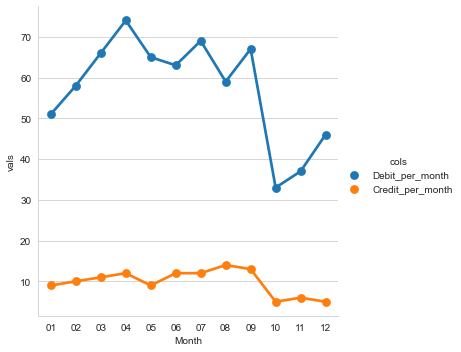

In [247]:
fig = sns.catplot(x='Month',y='vals',hue='cols',data=dfm,kind='point')
sns.set_style('whitegrid')

In [248]:
debit_credit_per_month_1.set_index('Month',inplace=True)
display(debit_credit_per_month_1)

,Debit_per_month,Credit_per_month
Month,,
01,51,9
02,58,10
03,66,11
04,74,12
05,65,9
06,63,12
07,69,12
08,59,14
09,67,13


Text(0, 0.5, 'Percent')

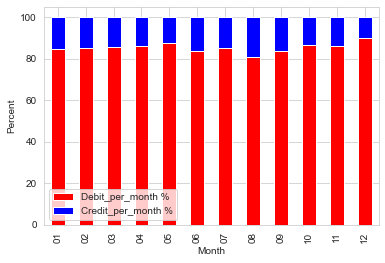

In [249]:
sum_column = debit_credit_per_month_1['Debit_per_month']+debit_credit_per_month_1['Credit_per_month']
debit_percent = debit_credit_per_month_1['Debit_per_month']*100/sum_column
credit_percent = debit_credit_per_month_1['Credit_per_month']*100/sum_column
debit_credit_per_month_1['Debit_per_month %']=debit_percent
debit_credit_per_month_1['Credit_per_month %']=credit_percent
debit_credit_per_month_1.drop(['Debit_per_month','Credit_per_month'],axis=1,inplace=True)
debit_credit_per_month_1.plot(kind='bar',stacked=True,color=['Red','Blue'])
plt.ylabel('Percent')